<a href="https://colab.research.google.com/github/MohdRad/ML_Course/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the following tutorial, we will learn to how implement MultiLayer Perceptron Neural Networks using keras

In [62]:
import pandas as pd
import numpy as np
from keras import models # NN
from keras import layers # NN
from keras import backend as K
from keras.optimizers import SGD, RMSprop, Adadelta, Nadam
from keras import backend as K
from sklearn.metrics import mean_squared_error, r2_score # MSE
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


Import data, define X and y, and scale them

In [2]:
# Import the data and shuffle it (randomize it)
df = shuffle(pd.read_csv('housing.csv'))
# Display the data
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
186,0.05602,0.0,2.46,0,0.488,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4
27,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307,21.0,306.38,17.28,14.8
75,0.09512,0.0,12.83,0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
109,0.26363,0.0,8.56,0,0.520,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.06162,0.0,4.39,0,0.442,5.898,52.3,8.0136,3,352,18.8,364.61,12.67,17.2
50,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4,243,16.8,395.56,13.45,19.7
480,5.82401,0.0,18.10,0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,23.0
290,0.03502,80.0,4.95,0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33,28.5


In [3]:
X = np.array(df.drop(['MEDV'], axis=1))
# The output is MEDV
y = np.array(df['MEDV'])
y = y.reshape(-1,1)

L = int(0.8*len(X))
X_train = X[:L]
y_train = y[:L]
X_test = X[L:]
y_test = y[L:]

# X scaler
X_scaler = MinMaxScaler()
# Let the scaler defines the maximum and the minimum
X_scaler.fit(X_train)
# Apply scaling to train X data
X_train_scaled = X_scaler.transform(X_train)
# test data
X_scaler.fit(X_test)
X_test_scaled = X_scaler.transform(X_test)

# y scaler
y_scaler = MinMaxScaler()
y_scaler.fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_scaler.fit(y_test)
# No need to scale the y_val, it will not and should not be used by the ML model

MinMaxScaler()

Now let's define the neural network (NN). The smallest NN is called Artificial Neural Network (ANN). This network has 1 input layer, 1 hidden layer, and 1 output layer. If you use more than 1 hidden layer and up to 3, this is called MLP, when you use 4 and more, this is called Deep Neural Network (DNN). We will define MLP with two hidden layers

In [59]:
model = models.Sequential()
# Input layer
# assign the number of input features to n to be used in the input layer
# m is the number of rows and n is the number of columns of X_train
m,n = np.shape(X_train)
# Input layer, here we will use the variable n for number of hidden units
model.add(layers.Dense(n,              # Number of hidden units == number of input features
                   activation='tanh',  # Activation function, 'sigmoid' and 'relu' are other choices
                   input_shape=(n,)))  # The dimensions of the input = n
# Hidden Layers
# Layer 1
model.add(layers.Dense(10,
                   activation='tanh',
                   kernel_initializer='normal'))
# Layer 2
model.add(layers.Dense(5,
                       activation='tanh',
                       kernel_initializer='normal'))
# Output layer
model.add(layers.Dense(1,               # Number of hidden units equals number of outputs
                   activation='tanh'))

# After a model is created, you must call its compile() method to specify the
# loss function is mean squraed error (mse) and the optimizer is adam (most common).
model.compile(loss= 'mse', optimizer= 'adam')
# Training the Model
history = model.fit(X_train_scaled,
                    y_train_scaled,
                    epochs=500,           # Number of iterations
                    batch_size=10,        # Number of samples in each batch. Number of batches is the number of training samples / Number of samples in each batch
                    verbose=1,            # Print the progress
                    validation_split=0.1, # fraction of the training data that is used for validation, this is to generate validation learning curve to inspect overfitting.
                    shuffle=False)        # put it False since we shuffled the data and to get smooth learning curves.


Epoch 1/500
37/37 [==============================] - 1s 8ms/step - loss: 0.1364 - val_loss: 0.0837
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0498 - val_loss: 0.0498
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0392
Epoch 4/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0327 - val_loss: 0.0296
Epoch 5/500
37/37 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.0252
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.0233
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0237 - val_loss: 0.0216
Epoch 8/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0219 - val_loss: 0.0199
Epoch 9/500
37/37 [==============================] - 0s 3ms/step - loss: 0.0201 - val_loss: 0.0182
Epoch 10/500
37/37 [==============================] - 2s 42ms/step - loss: 0.0184 - val_loss: 0.0166
Epoch 11

The learning curves for neural networks show the loss function (error) with epochs (iterations). The loss should decrease with epochs and both validation and training curves should stay close to each other as shown in the Figure below. **If the validation curve becomes siginificantly higher than the learning one, this is overfitting.** Note that lograthmic scale is used on the y-axis because Mean Squared Error is usually very small.

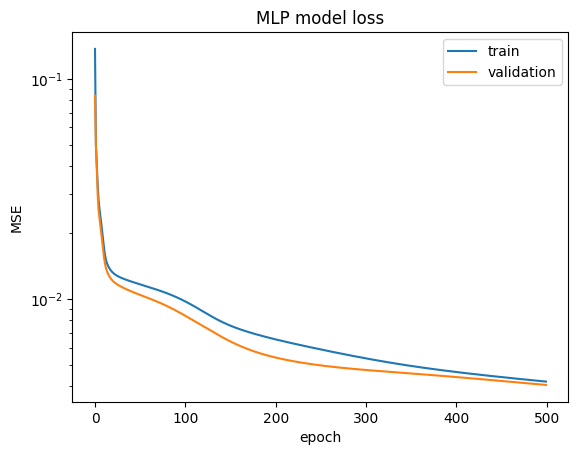

In [65]:
# Plot Learning Curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP model loss')
plt.ylabel('MSE')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [61]:
# Model Predictions
model_pred_y = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(model_pred_y)
R2 = r2_score(y_test, y_pred)
print ('R2 = ', R2)

4/4 [==============================] - 0s 3ms/step
R2 =  0.8378543412072577


The R$^2$ is comparable to Random Forest and Gradient Boosting from tutorial one.

While there might be packages to do hyperparameters tuning for keras, I like to do it via a function. You can recreate the model in the 4th code block as a function and assign `epochs`, `batch_size`, `number of hidden units in the hidden layers`, `optimizer`, `activation` as variables. I will leave this to you as an excerise. Make a function to tune `epochs`, `batch_size`, and the number of hidden units in the two hidden layers (above I used 10 and 5).  